# Modeling and Simulation in Python

Rabbit example

Copyright 2017 Allen Downey

License: [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0)


In [1]:
# If you want the figures to appear in the notebook, 
# and you want to interact with them, use
# %matplotlib notebook

# If you want the figures to appear in the notebook, 
# and you don't want to interact with them, use
# %matplotlib inline

# If you want the figures to appear in separate windows, use
# %matplotlib qt5

# To switch from one to another, you have to select Kernel->Restart

%matplotlib inline

from modsim import *

This notebook develops a simple growth model, like the ones in Chapter 3, and uses it to demonstrate a parameter sweep.

The system we'll model is a rabbit farm.  Suppose you start with an initial population of rabbits and let them breed.  For simplicity, we'll assume that all rabbits are on the same breeding cycle, and we'll measure time in "seasons", where a season is the reproductive time of a rabbit.

If we provide all the food, space and other resources a rabbit might need, we expect the number of new rabbits each season to be proportional to the current population, controlled by a parameter, `birth_rate`, that represents the number of new rabbits per existing rabbit, per season.  As a starting place, I'll assume `birth_rate = 0.9`.

Sadly, during each season, some proportion of the rabbits die.  In a detailed model, we might keep track of each rabbit's age, because the chance of dying is probably highest for young and old rabbits, and lowest in between.  But for simplicity, we'll model the death process with a single parameter, `death_rate`, that represent the number
of deaths per rabbit per season.   As a starting place, I'll assume `death_rate = 0.5`.

Here's a system object that contains these parameters as well as:

* The initial population, `p0`,
* The initial time, `t0`, and
* The duration of the simulation, `t_end`, measured in seasons.

In [2]:
#files on naomi's computer here 
import pandas as pd
pop=pd.read_csv("C:/ModSim/Population.csv", header=0, index_col=0)
print(pop)

rem=pd.read_csv("C:/ModSim/Removed.csv", header=0, index_col=0)
print(rem)

spy=pd.read_csv("C:/ModSim/Spayed.csv", header=0, index_col=0)
print(spy)

FileNotFoundError: File b'C:/ModSim/Population.csv' does not exist

In [18]:
population = pop.pop
pop.head()

removed = rem.Removed
rem.head()

NameError: name 'pop' is not defined

In [ ]:
first_year = pop.index[-1]
last_year = pop.index[0]
p0 = 42138

In [ ]:
system = System(t0 = first_year, 
                t_end = last_year,
                p0 = p0,
                growth_rate = .2,)

system

Here's a version of run_simulation, similar to the one in Chapter 3, with both births and deaths proportional to the current population.

In [ ]:
def run_simulation(system):
    """Runs a proportional growth model.
    
    Adds TimeSeries to `system` as `results`.
    
    system: System object with t0, t_end, p0,
            birth_rate and death_rate
    """
    results = TimeSeries()
    results[system.t0] = system.p0
    for t in linrange(system.t0, system.t_end):
        growth = system.growth_rate * results[t]
        results[t+1] = results[t] + growth
    system.results = results

Now we can run the simulation and display the results:

In [ ]:
run_simulation(system)
system.results

Notice that the simulation actually runs one season past `t_end`.  That's an off-by-one error that I'll fix later, but for now we don't really care.

The following function plots the results.

In [ ]:
def plot_results(system, title=None):
    """Plot the estimates and the model.
    
    system: System object with `results`
    """
    newfig()
    plot(system.results, 'bo', label='horses and burros')
    decorate(xlabel='Year', 
             ylabel='Population',
             title=title)

And here's how we call it.

In [ ]:
plot_results(system, title='Natural Growth Model')

In [ ]:
plot(pop, 'ro', label='horses and burros')
decorate(xlabel='Year', 
         ylabel='Population',plot_results(system, title='Natural Growth Model')
         title= 'Historical Growth')

In [ ]:
plot_results(system, title='Natural and Historical Growth Model')
plot(pop, 'ro', label='horses and burros')


In [ ]:
first_year = rem.index[-1]
last_year = rem.index[0]
p0 = 31206

In [ ]:
system = System(t0 = first_year, 
                t_end = last_year,
                p0 = p0,
                growth_rate = .2,)

system

In [ ]:
def run_simulation2(system):
    """Runs a proportional growth model.
    
    Adds TimeSeries to `system` as `results`.
    
    system: System object with t0, t_end, p0,
            birth_rate and death_rate
    """
    results = TimeSeries()
    removed = TimeSeries()
    results[system.t0] = system.p0
    for t in linrange(system.t0, system.t_end):
        growth = system.growth_rate * results[t]
        results[t+1] = results[t] + growth - removed[t]
    system.results = results

In [ ]:
run_simulation2(system)

In [ ]:
plot_results(system, title='Natural and Historical Growth Model')
plot(pop, 'ro', label='horses and burros')

In [19]:
data=pd.read_csv("~/documents/github/modsimpy/data.csv", header = 0, index_col = 0)
print(data)

       population  spayed  removed
year                              
2017      72674.0     NaN      NaN
2016          NaN   487.0   3259.0
2015      58150.0   469.0   3812.0
2014      49209.0    40.0   1857.0
2013      40605.0   332.0   5452.0
2012      37294.0   952.0   8255.0
2011      38497.0   791.0   8529.0
2010      38365.0   429.0   7291.0
2009      36940.0     NaN   6036.0
2008      33105.0     NaN      NaN
2007      28563.0     NaN      NaN
2006      31206.0     NaN      NaN
2005      31760.0     NaN      NaN
2004      37135.0     NaN      NaN
2003      37186.0     NaN      NaN
2002      38815.0     NaN      NaN
2001      45414.0     NaN      NaN
2000      48624.0     NaN      NaN
1999      47376.0     NaN      NaN
1998      44495.0     NaN      NaN
1997      43036.0     NaN      NaN
1996      42138.0     NaN      NaN


In [20]:
data.head()

,population,spayed,removed
year,,,
2017,72674.0,NaN,NaN
2016,NaN,487.0,3259.0
2015,58150.0,469.0,3812.0
2014,49209.0,40.0,1857.0
2013,40605.0,332.0,5452.0


In [36]:
data.columns = ['population', 'spayed', 'removed']

In [47]:
data.index[-1]

1996

In [65]:
population = data.population
removal = data.removed
#first_year = data.index[-1] #these #s are because the data is backwards 
first_year = 2009
last_year = data.index[0]
initial_population = data['population'][2009] 
growth_rate= 0.2

In [66]:
system = System(t0 = first_year, p0 = initial_population, t_end = last_year, growth_rate = growth_rate)

In [67]:
def run_simulation3(system):
    """Runs a proportional growth model.
    
    Adds TimeSeries to `system` as `results`.
    
    system: System object with t0, t_end, p0,
            birth_rate and death_rate
    """
    results = TimeSeries()
    results[system.t0] = system.p0
    for t in linrange(system.t0, system.t_end):
        growth = system.growth_rate * results[t]
        results[t+1] = results[t] + growth - data['removed'][t]
    system.results = results

In [68]:
run_simulation3(system)

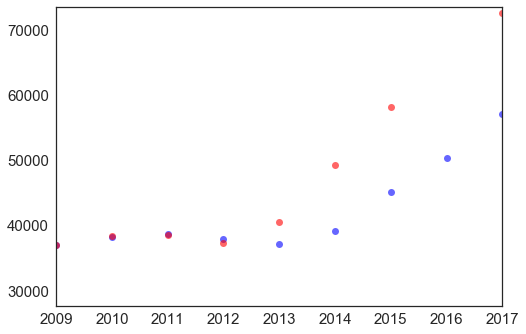

In [69]:
plot(system.results, 'bo', label = 'predicted')
plot(population, 'ro', label='horses and burros')

xlim(2009, 2017);

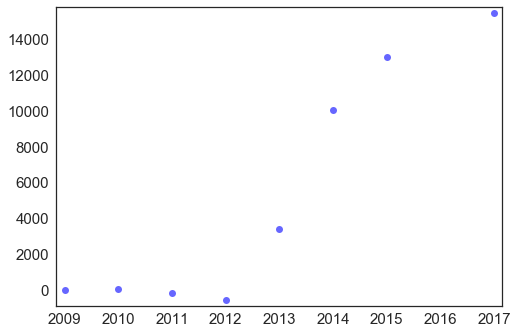

In [70]:
stuff = population - system.results
plot(stuff, 'bo', label = 'predicted')


In [81]:
population = data.population
removal = data.removed
#first_year = data.index[-1] #these #s are because the data is backwards 
first_year = 2009
last_year = data.index[0]
initial_population = data['population'][2009] 
growth1= 0.2
growth2 = 0.275

In [82]:
system = System(t0 = first_year, p0 = initial_population, t_end = last_year, growth1 = growth1, growth2=growth2)

In [83]:
def run_simulation4(system):
    """Runs a proportional growth model.
    
    Adds TimeSeries to `system` as `results`.
    
    system: System object with t0, t_end, p0,
            birth_rate and death_rate
    """
    results = TimeSeries()
    results[system.t0] = system.p0
    for t in linrange(system.t0, system.t_end):
        if t < 2012:
            growth = system.growth1 * results[t]
            results[t+1] = results[t] + growth - data['removed'][t]
        else:
            growth = system.growth2 * results[t]
            results[t+1] = results[t] + growth - data['removed'][t]
    system.results = results

In [84]:
run_simulation4(system)

In [102]:
def decorate():  
    legend(loc = 'random string')
    label_axes(title='Olin-Wellesley Bikeshare',
               xlabel='Time step (min)', 
               ylabel='Number of bikes')

True

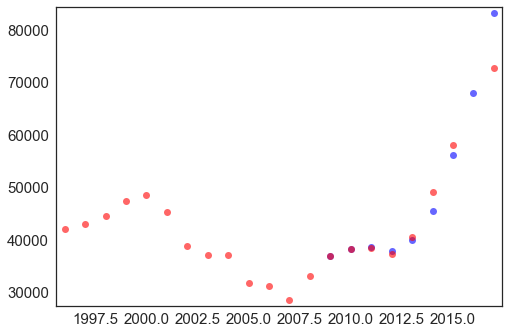

In [105]:
plot(system.results, 'bo', label = 'predicted')
plot(population, 'ro', label='horses and burros')
#decorate()
#xlim(2009, 2017)
legend

Let's suppose our goal is to maximize the number of rabbits, so the metric we care about is the final population.  We can extract it from the results like this:

In [4]:
def final_population(system):
    t_end = system.results.index[-1]
    return system.results[t_end]

And call it like this:

In [5]:
final_population(system)

NameError: name 'system' is not defined

To explore the effect of the parameters on the results, we'll define `make_system`, which takes the system parameters as function parameters(!) and returns a `System` object:

In [6]:
def make_system(birth_rate=0.9, death_rate=0.5):
    
    system = System(t0 = 0, 
                    t_end = 10,
                    p0 = 10,
                    birth_rate = birth_rate,
                    death_rate = death_rate)
    return system

Now we can make a `System`, run a simulation, and extract a metric:

In [7]:
system = make_system()
run_simulation(system)
final_population(system)

NameError: name 'run_simulation' is not defined

To see the relationship between `birth_rate` and final population, we'll define `sweep_birth_rate`:

In [8]:
def sweep_birth_rate(birth_rates, death_rate=0.5):
    
    for birth_rate in birth_rates:
        system = make_system(birth_rate=birth_rate,
                             death_rate=death_rate)
        run_simulation(system)
        p_end = final_population(system)
        plot(birth_rate, p_end, 'gs', label='rabbits')
        
    decorate(xlabel='Births per rabbit per season',
             ylabel='Final population')

The first parameter of `sweep_birth_rate` is supposed to be an array; we can use `linspace` to make one.

In [9]:
birth_rates = linspace(0, 1, 21)
birth_rates

array([ 0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,
        0.45,  0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,  0.8 ,  0.85,
        0.9 ,  0.95,  1.  ])

Now we can call `sweep_birth_rate`.

The resulting figure shows the final population for a range of values of `birth_rate`.

Confusingly, the results from a parameter sweep sometimes resemble a time series.  It is very important to remember the difference.  One way to avoid confusion: LABEL THE AXES.

In the following figure, the x-axis is `birth_rate`, NOT TIME.

In [10]:
birth_rates = linspace(0, 1, 21)
sweep_birth_rate(birth_rates)

NameError: name 'run_simulation' is not defined

The code to sweep the death rate is similar.

In [11]:
def sweep_death_rate(death_rates, birth_rate=0.9):
    
    for death_rate in death_rates:
        system = make_system(birth_rate=birth_rate,
                             death_rate=death_rate)
        run_simulation(system)
        p_end = final_population(system)
        plot(death_rate, p_end, 'r^', label='rabbits')
        
    decorate(xlabel='Deaths per rabbit per season',
             ylabel='Final population')

And here are the results.  Again, the x-axis is `death_rate`, NOT TIME.

In [12]:
death_rates = linspace(0.1, 1, 20)
sweep_death_rate(death_rates)

NameError: name 'run_simulation' is not defined

In the previous sweeps, we hold one parameter constant and sweep the other.

You can also sweep more than one variable at a time, and plot multiple lines on a single axis.

To keep the figure from getting too cluttered, I'll reduce the number of values in `birth_rates`:

In [13]:
birth_rates = linspace(0.4, 1, 4)
birth_rates

array([ 0.4,  0.6,  0.8,  1. ])

By putting one for loop inside another, we can enumerate all pairs of values.

The results show 4 lines, one for each value of `birth_rate`.

(I did not plot the lines between the data points because of a limitation in `plot`.)

In [14]:
for birth_rate in birth_rates:
    for death_rate in death_rates:
        system = make_system(birth_rate=birth_rate,
                             death_rate=death_rate)
        run_simulation(system)
        p_end = final_population(system)
        plot(death_rate, p_end, 'c^', label='rabbits')
        
decorate(xlabel='Deaths per rabbit per season',
         ylabel='Final population')

NameError: name 'run_simulation' is not defined

If you suspect that the results depend on the difference between `birth_rate` and `death_rate`, you could run the same loop, plotting the "net birth rate" on the x axis.

If you are right, the results will fall on a single curve, which means that knowing the difference is sufficient to predict the outcome; you don't actually have to know the two parameters separately.

In [15]:
for birth_rate in birth_rates:
    for death_rate in death_rates:
        system = make_system(birth_rate=birth_rate,
                             death_rate=death_rate)
        run_simulation(system)
        p_end = final_population(system)
        net_birth_rate = birth_rate - death_rate
        plot(net_birth_rate, p_end, 'mv', label='rabbits')
        
decorate(xlabel='Net births per rabbit per season',
         ylabel='Final population')

NameError: name 'run_simulation' is not defined

On the other hand, if you guess that the results depend on the ratio of the parameters, rather than the difference, you could check by plotting the ratio on the x axis.

If the results don't fall on a single curve, that suggests that the ratio alone is not sufficient to predict the outcome. 

In [16]:
for birth_rate in birth_rates:
    for death_rate in death_rates:
        system = make_system(birth_rate=birth_rate,
                             death_rate=death_rate)
        run_simulation(system)
        p_end = final_population(system)
        birth_ratio = birth_rate / death_rate
        plot(birth_ratio, p_end, 'y>', label='rabbits')
        
decorate(xlabel='Ratio of births to deaths',
         ylabel='Final population')

NameError: name 'run_simulation' is not defined